Starting Imports

In [61]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

Enviroment

In [62]:
env = Environment(latitude=31.9417, longitude=-102.2047, elevation=875) #currently set to Spaceport America, New Mexico

In [63]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1) #can only go 16 days in advance

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7921 m/s²
Acceleration of gravity at   3.048 km (ASL): 9.7854 m/s²


Launch Site Details

Launch Date: 2025-11-07 12:00:00 UTC
Launch Site Latitude: 31.94170°
Launch Site Longitude: -102.20470°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 197037.53 W    3538459.04 N
Launch Site UTM zone: 13R
Launch Site Surface Elevation: 873.2 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 3.048 km
Forecast Time Period: from 2025-11-06 12:00:00 to 2025-11-22 12:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 5.79 m/s
Surface Wind Direction: 300.58°
Surface Wind Heading: 120.58°
Surface Pressure: 911.78 hPa
Surface Temperature: 291.91 K
Surface Air Density: 1.088 kg/m³
Surface Speed of Sound: 342.51 m/s


Earth Model Details

Earth Radius at Launch s

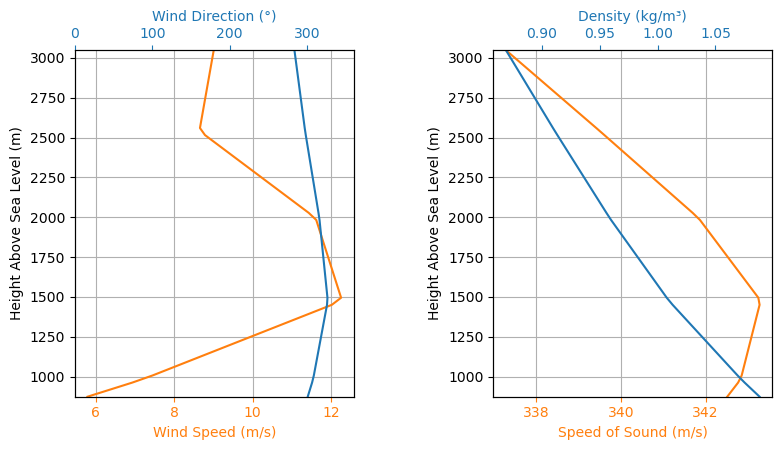

In [64]:
env.max_expected_height = 3048
env.info()

Motor

Below is data for MS2500. Note: Some data is estimates

Copy the format below to produce additional motors

11/6 added M2000R

In [72]:
MS2500T = SolidMotor(
    thrust_source="../../data/motors/aerotech/AeroTech_M2500T.eng",
    dry_mass=2.367,
    dry_inertia=(0.113, 0.113, 0.00806),
    center_of_dry_mass_position=0.325,
    grains_center_of_mass_position=0.430,
    burn_time=3.9,
    grain_number=6,
    grain_separation=5 / 1000,
    grain_density=1750,
    grain_outer_radius=47 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=121 / 1000,
    nozzle_radius=43.3 / 1000,
    throat_radius=12.5 / 1000,
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

In [65]:
M2000R = SolidMotor(
    thrust_source="../../data/motors/aerotech/AeroTech_M2000R.eng",
    dry_mass=3.619,
    dry_inertia=(0.113, 0.113, 0.00806),
    center_of_dry_mass_position=0.33,
    grains_center_of_mass_position=0.4425,
    burn_time=4,
    grain_number=5,
    grain_separation=5 / 1000,
    grain_density=1750,
    grain_outer_radius=47 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=121 / 1000,
    nozzle_radius=43.3 / 1000,
    throat_radius=12.5 / 1000,
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.0433 m
Nozzle Throat Radius: 0.0125 m

Grain Details
Number of Grains: 6
Grain Spacing: 0.005 m
Grain Density: 1750 kg/m3
Grain Outer Radius: 0.047 m
Grain Inner Radius: 0.015 m
Grain Height: 0.121 m
Grain Volume: 0.001 m3
Grain Mass: 1.320 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 7.919 kg
Structural Mass Ratio: 0.230
Average Propellant Exhaust Velocity: 1143.591 m/s
Average Thrust: 2322.054 N
Maximum Thrust: 4080.53093197668 N at 2.40567201759911 s after ignition.
Total Impulse: 9056.011 Ns



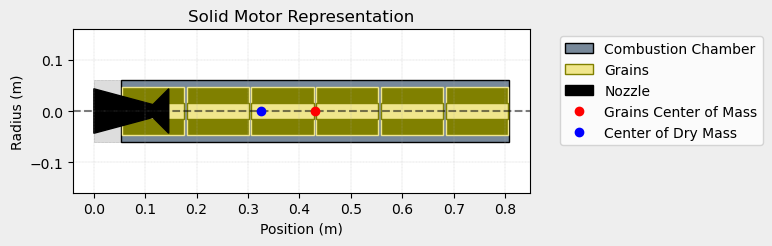

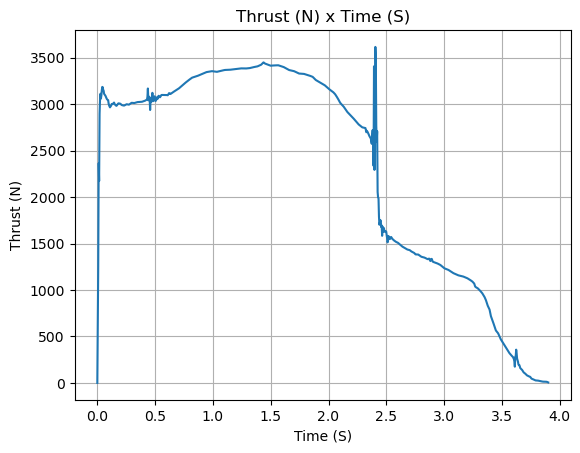

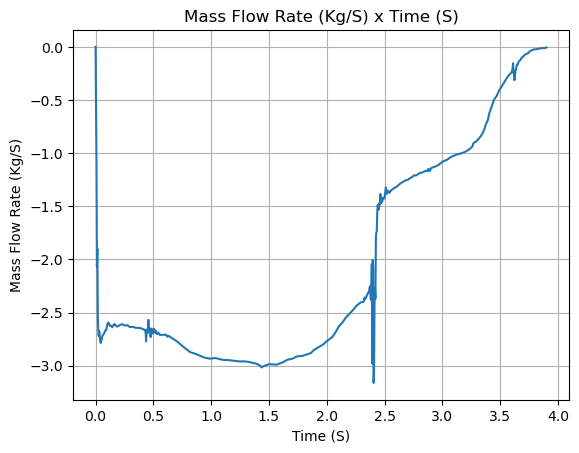

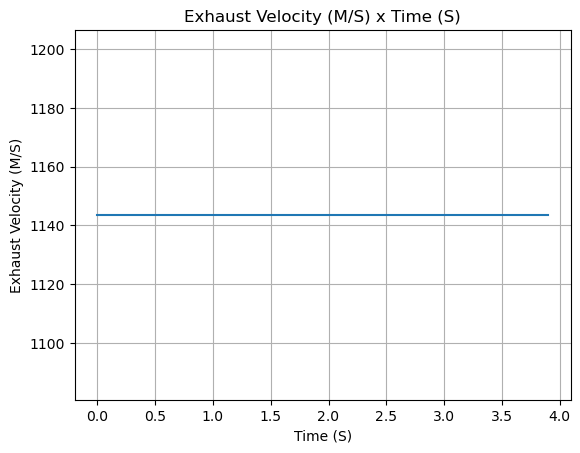

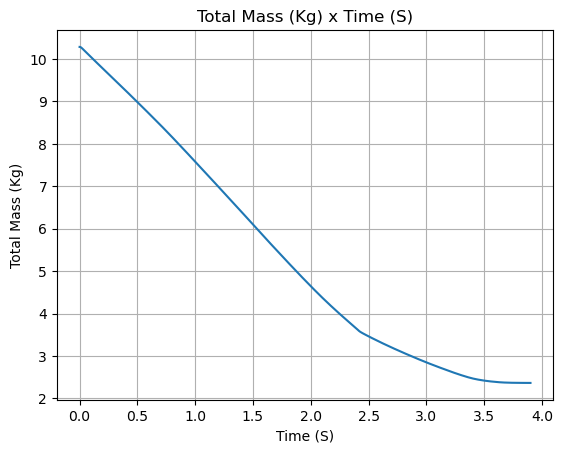

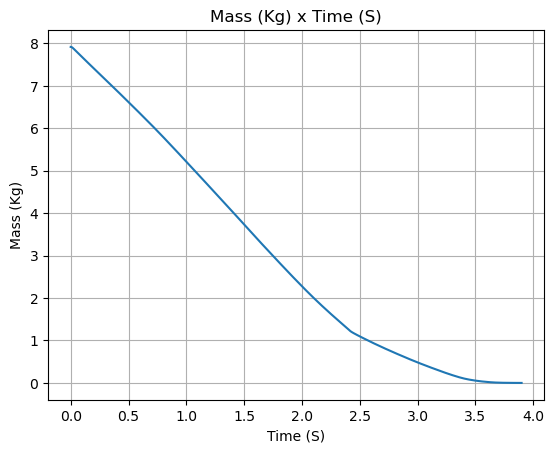

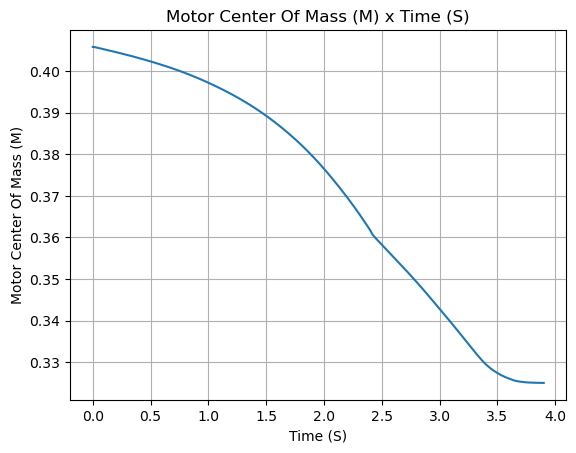

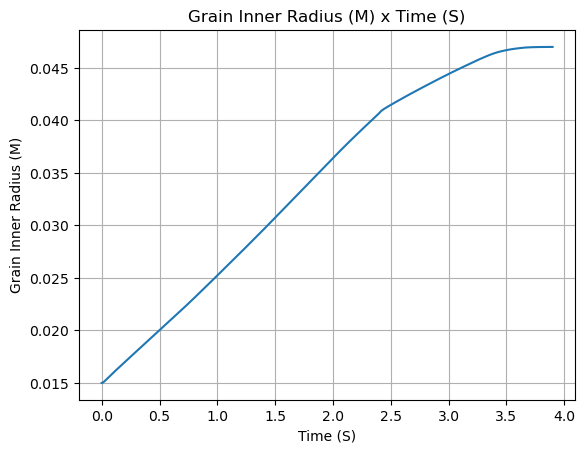

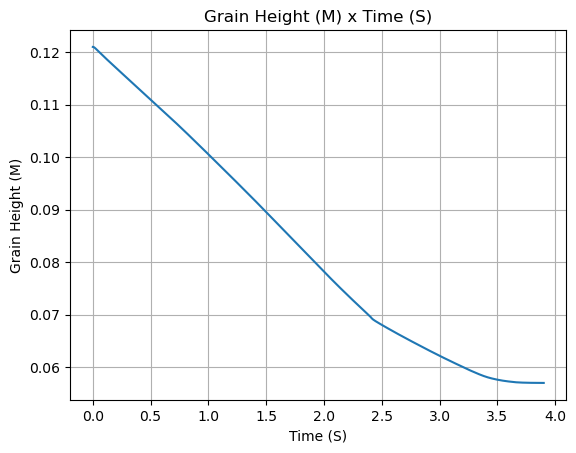

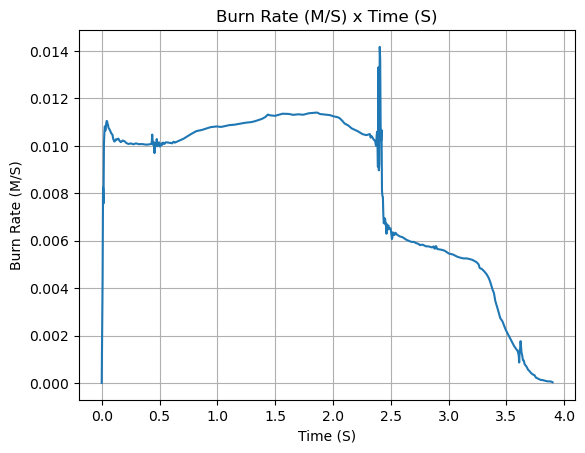

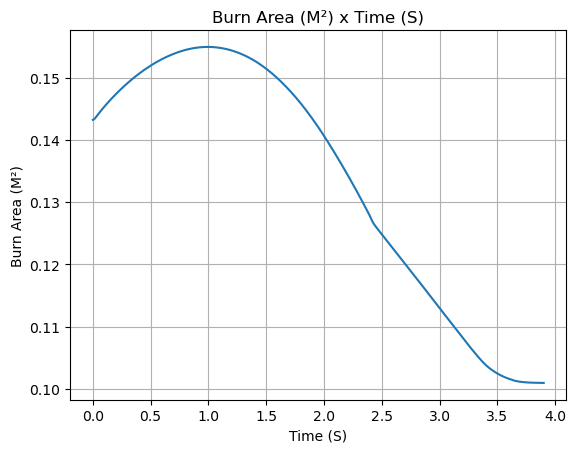

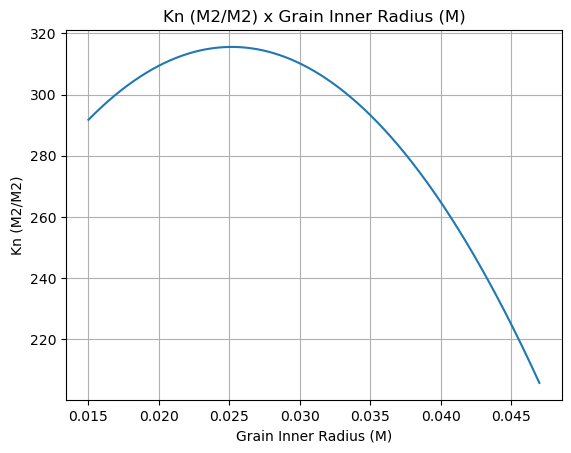

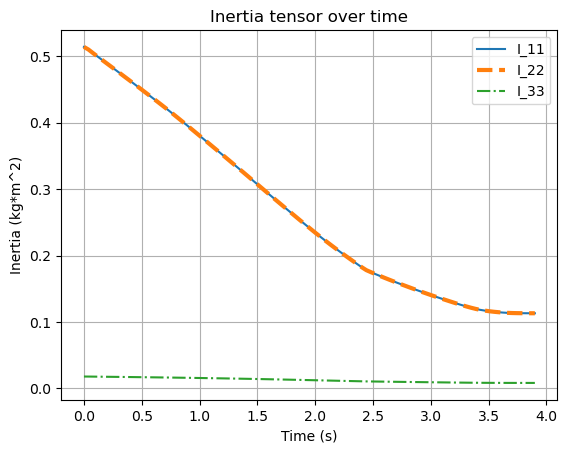

In [73]:
MS2500T.all_info()

Nozzle Details
Nozzle Radius: 0.0433 m
Nozzle Throat Radius: 0.0125 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1750 kg/m3
Grain Outer Radius: 0.047 m
Grain Inner Radius: 0.015 m
Grain Height: 0.121 m
Grain Volume: 0.001 m3
Grain Mass: 1.320 kg

Motor Details
Total Burning Time: 4 s
Total Propellant Mass: 6.599 kg
Structural Mass Ratio: 0.354
Average Propellant Exhaust Velocity: 1292.048 m/s
Average Thrust: 2131.590 N
Maximum Thrust: 2316.158 N at 1.974 s after ignition.
Total Impulse: 8526.361 Ns



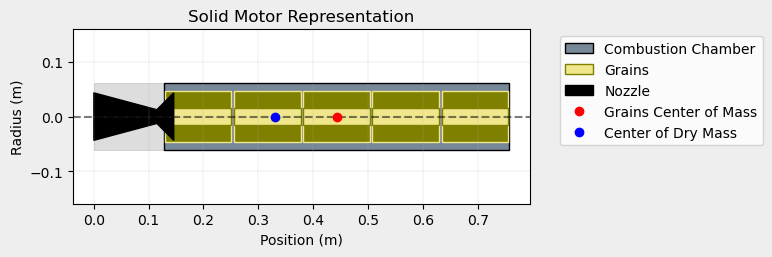

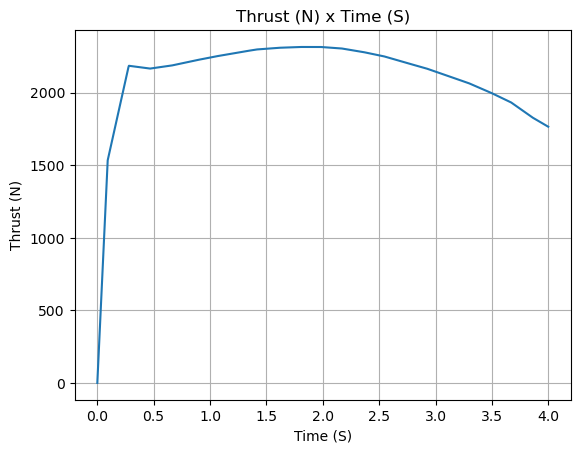

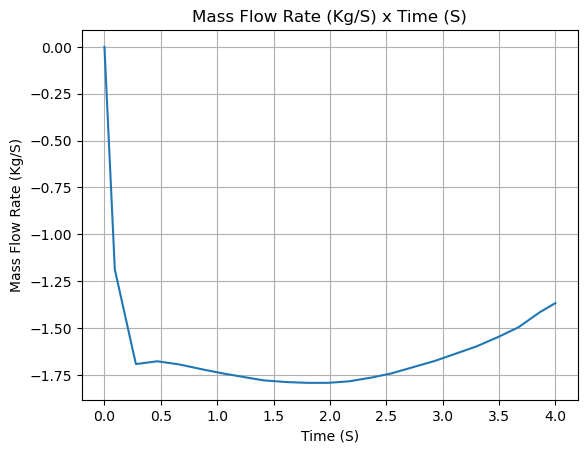

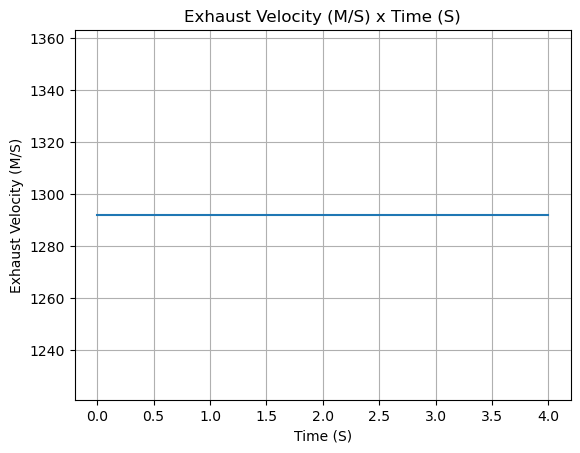

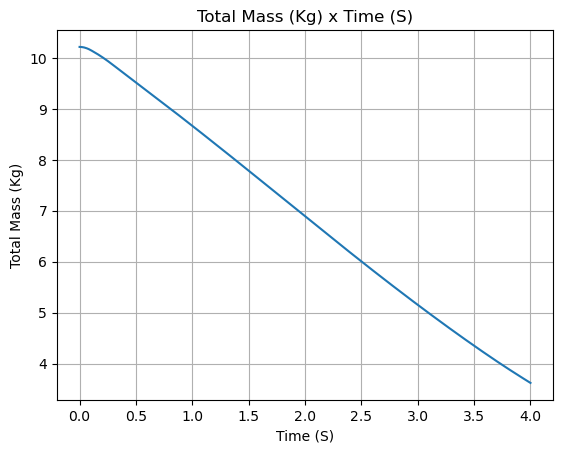

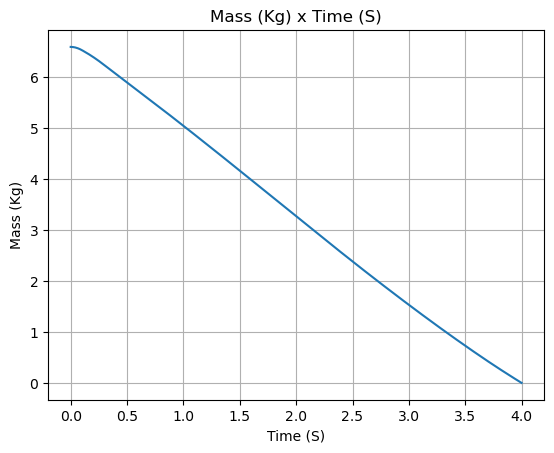

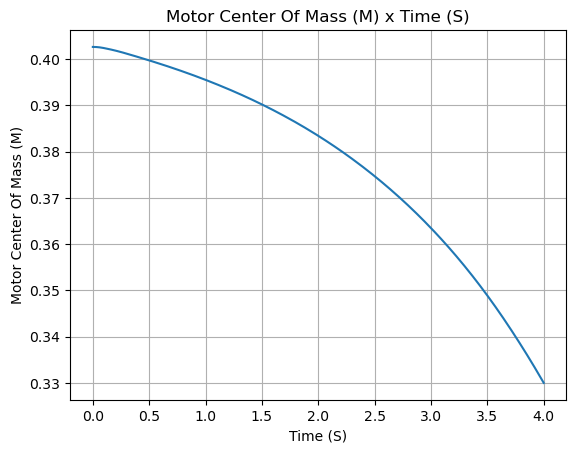

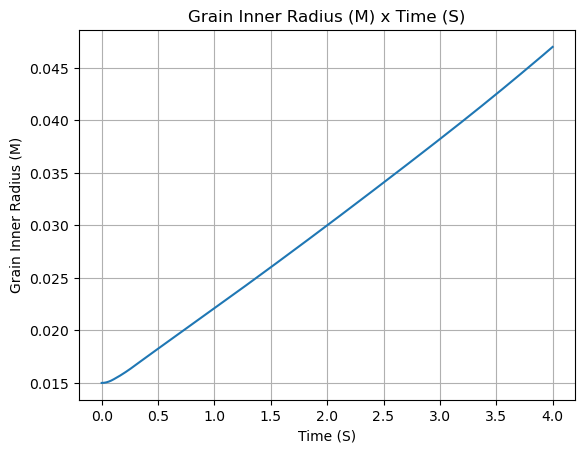

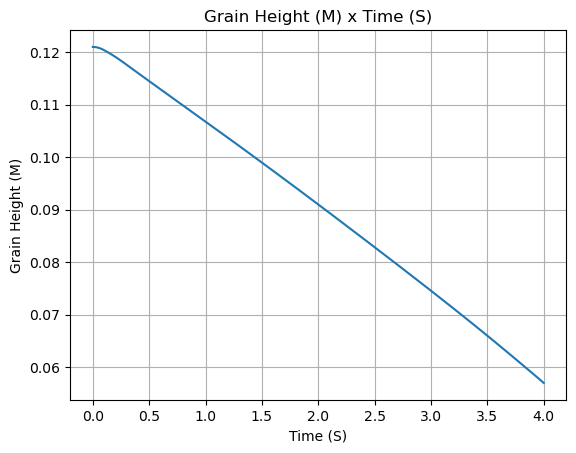

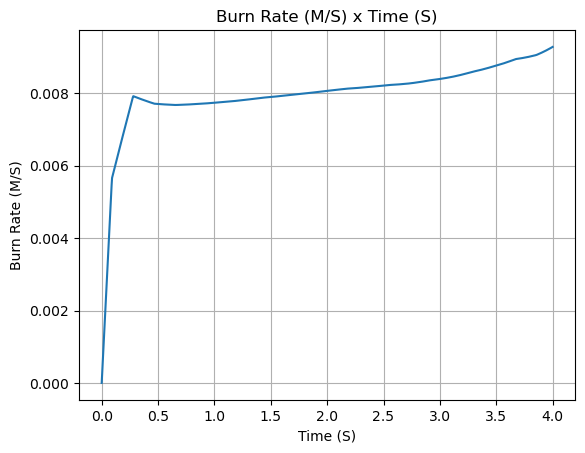

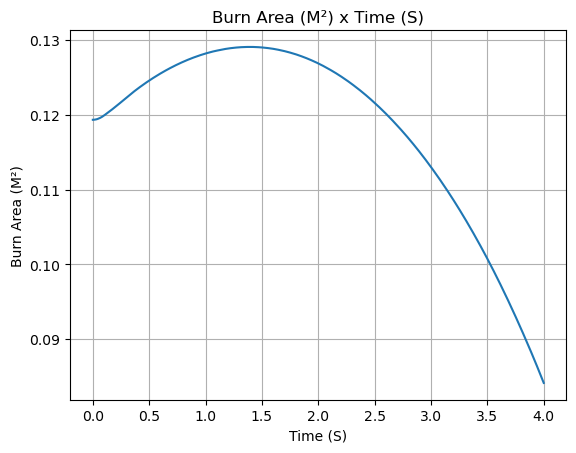

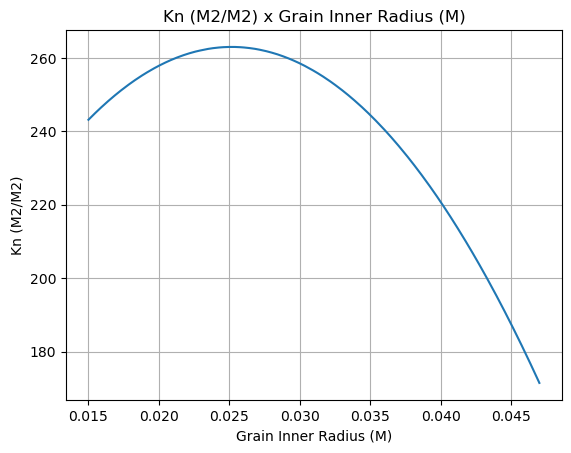

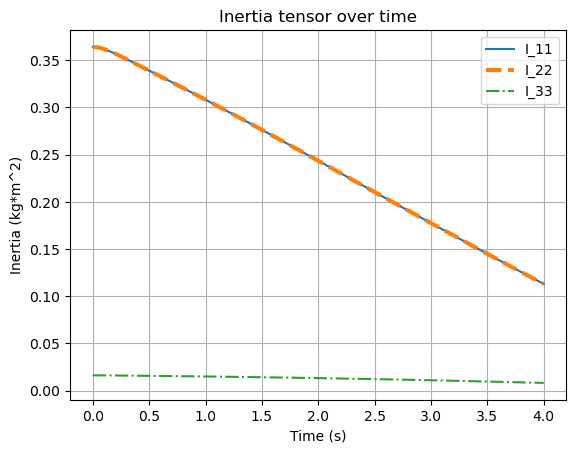

In [66]:
M2000R.all_info()

Rocket

Need to update to our rocket specs

Positions should be verified
Rocket Mass, Inertia, drag curves, and center of mass w/o motor
All data for tail and parachutes is needed
can optionally add airbrakes

11/6 updated specs to current design

In [67]:
NightOwl = Rocket(
    radius=0.078359,
    mass=17.313,
    inertia=(12.149888511924376, 12.149888511924376, 0.10630412056875299), 
    power_off_drag="../../data/rockets/NightOwl/powerOffDragCurve.csv",
    power_on_drag="../../data/rockets/NightOwl/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="nose_to_tail",
)

In [68]:
NightOwl.add_motor(M2000R, position=2.8956)

In [69]:
#optional Rail guides
rail_buttons = NightOwl.set_rail_buttons(
    upper_button_position=2.365375,
    lower_button_position=2.794,
    angular_position=45,
)

In [70]:
nose_cone = NightOwl.add_nose(
    length=0.6096, kind="ogive", position=0
)

fin_set = NightOwl.add_trapezoidal_fins(
    n=4,
    root_chord=0.4064,
    tip_chord=0.1016,
    span=0.1651,
    position=2.36855,
    sweep_length=0.254,
)

tail = NightOwl.add_tail(
    top_radius=0.078359, bottom_radius=0.0508, length=0.1016, position=2.794
)

main = NightOwl.add_parachute(
    name="main",
    cd_s=13.86,
    trigger=304.8,      # ejection altitude in meters
    # sampling_rate=105,
    # lag=1.5,
    # noise=(0, 8.3, 0.5),
)

drogue = NightOwl.add_parachute(
    name="drogue",
    cd_s=0.637,
    trigger="apogee",  # ejection at apogee
    # sampling_rate=105,
    # lag=1.5,
    # noise=(0, 8.3, 0.5),
)

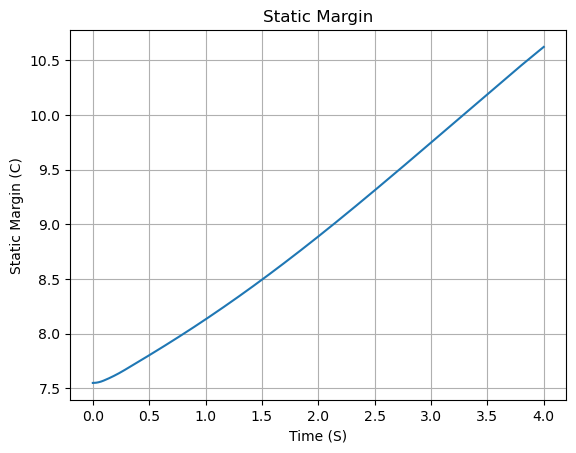

In [71]:
NightOwl.plots.static_margin()

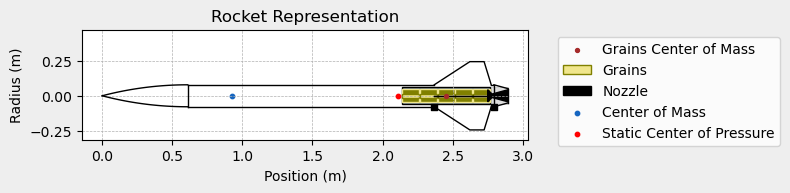

In [72]:
NightOwl.draw()

Simulation

In [73]:
test_flight = Flight(
    rocket=NightOwl, 
    environment=env, 
    rail_length=5.1816, 
    # inclination=85, 
    # heading=0
    )


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 873.19 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: -0.381 | e1: 0.081 | e2: -0.033 | e3: 0.920
Euler Angles - Spin φ : -45.00° | Nutation θ: -10.00° | Precession ψ: 270.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 7.549 c


Surface Wind Conditions

Frontal Surface Wind Speed: 4.85 m/s
Lateral Surface Wind Speed: -3.09 m/s


Launch Rail

Launch Rail Length: 5.1816 m
Launch Rail Inclination: 80.00°
Launch Rail Heading: 90.00°


Rail Departure State

Rail Departure Time: 0.455 s
Rail Departure Velocity: 25.133 m/s
Rail Departure Stability Margin: 7.775 c
Rail Departure Angle of Attack: 13.305°
Rail Departure Thrust-Weight Ratio: 8.215
Rail Departure Reynolds Number: 2.353e+05


Burn out State

Burn out time: 4.000 s
Altitude at burn out: 1447.558 m (ASL) | 574.363 m (AGL)
Rocket speed at burn out: 293.882 m/s
Freestr

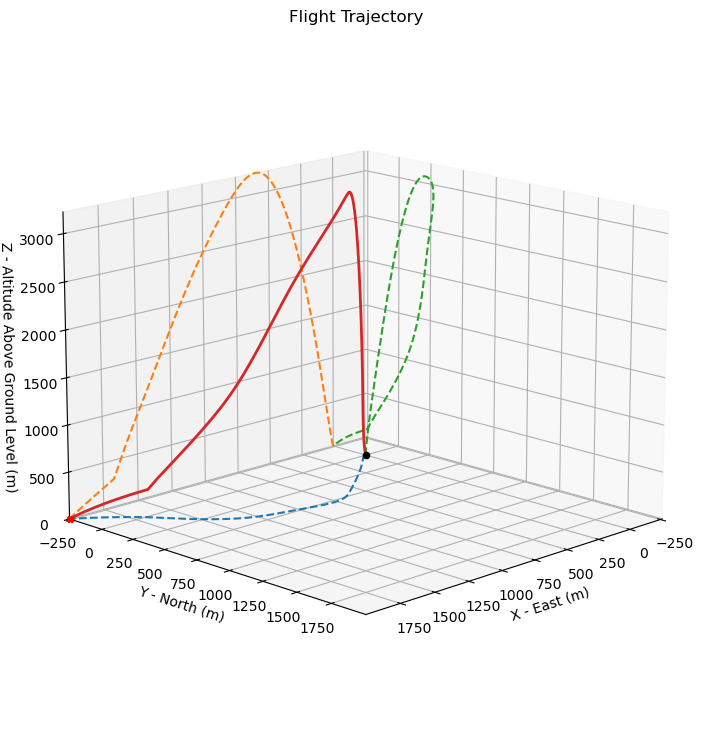



Trajectory Kinematic Plots



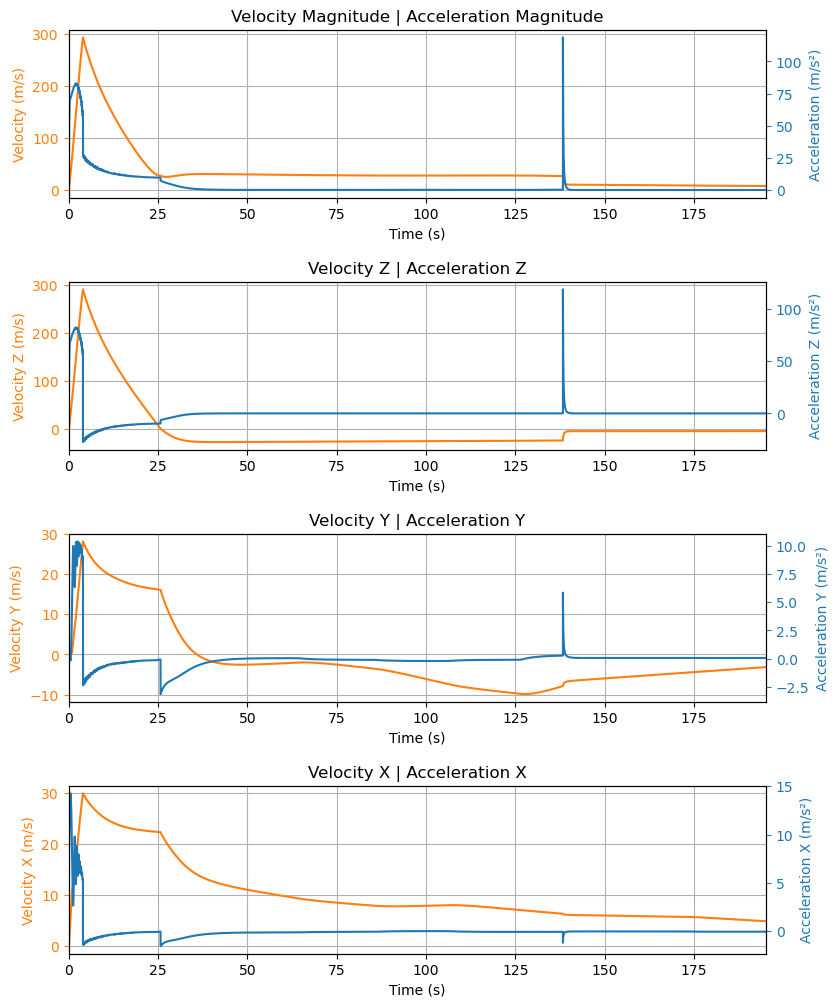



Angular Position Plots



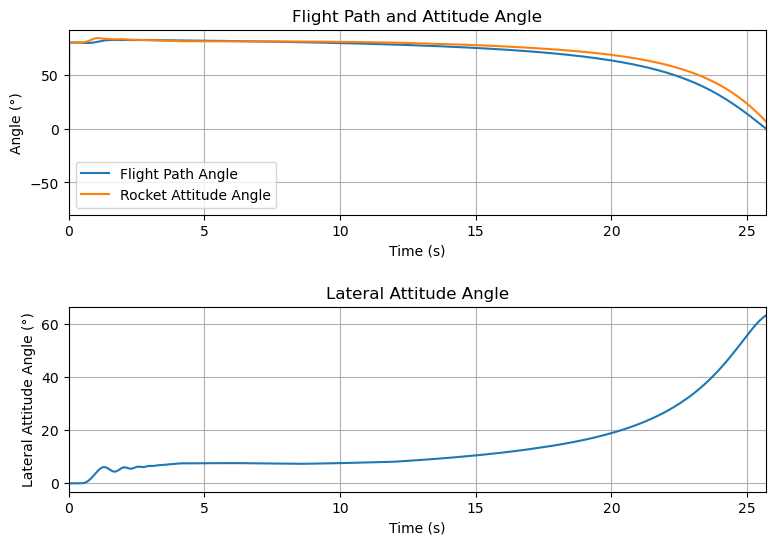



Path, Attitude and Lateral Attitude Angle plots



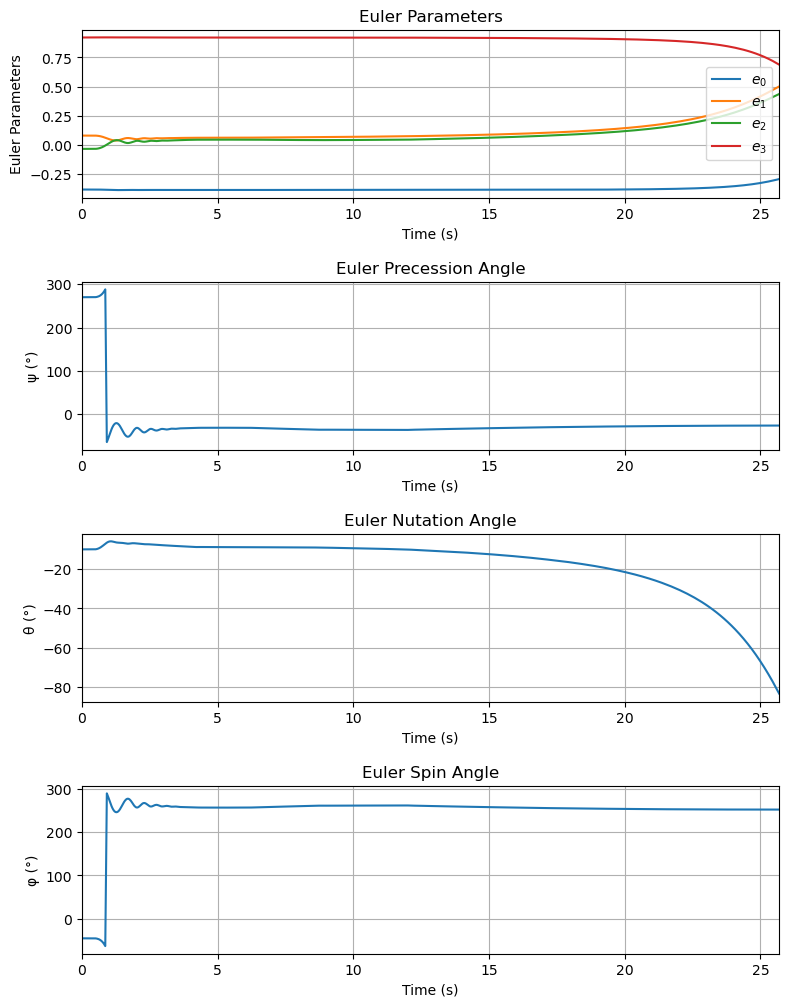



Trajectory Angular Velocity and Acceleration Plots



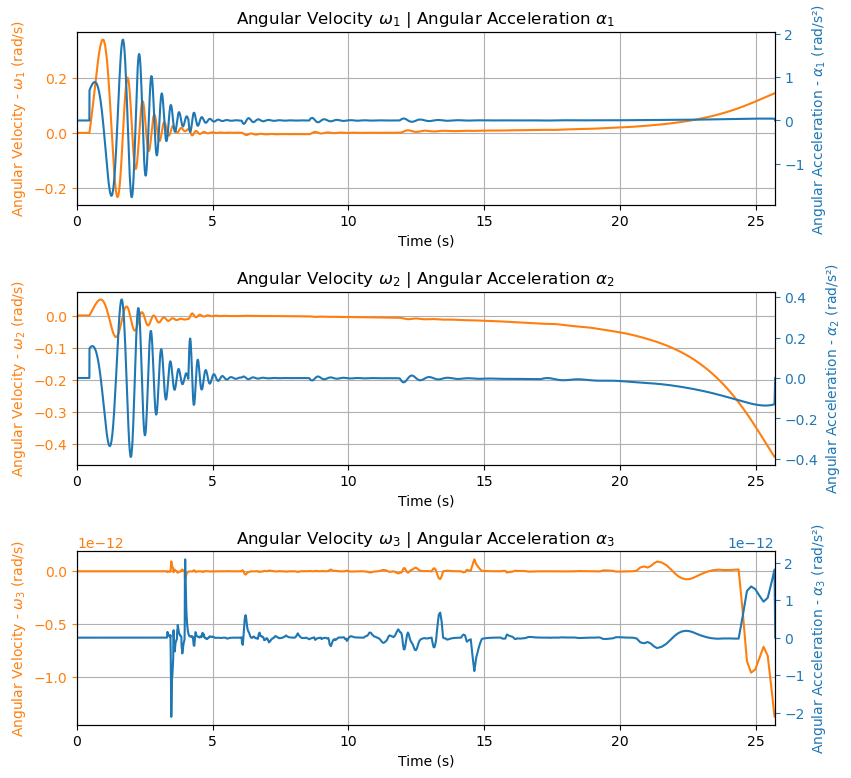



Aerodynamic Forces Plots



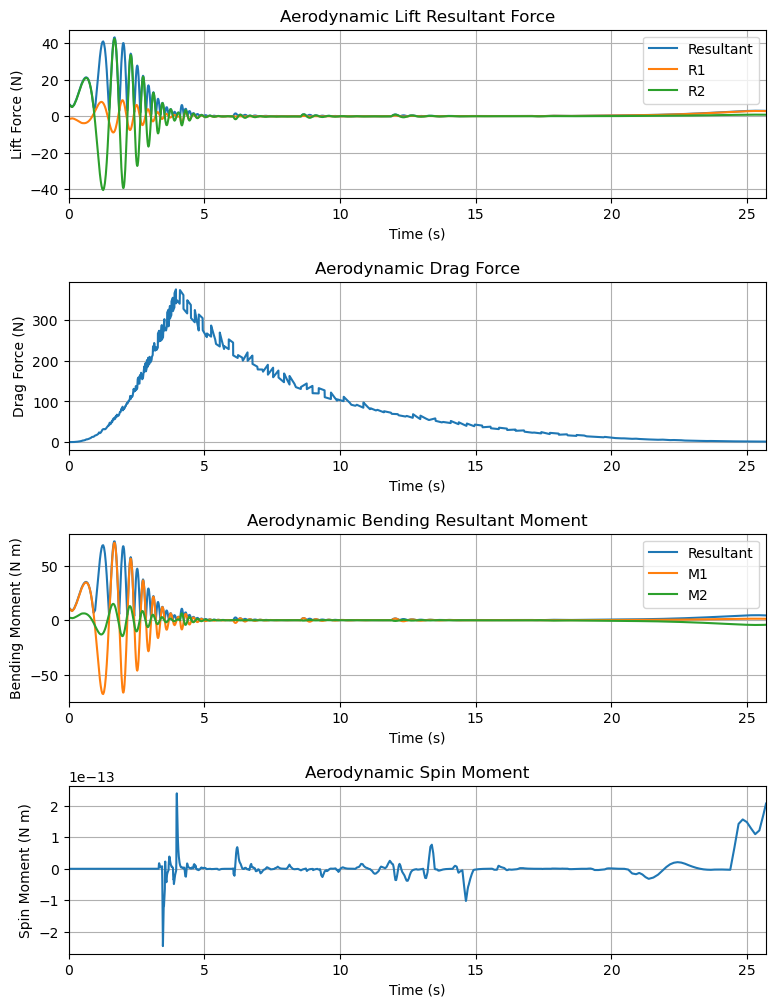



Rail Buttons Forces Plots



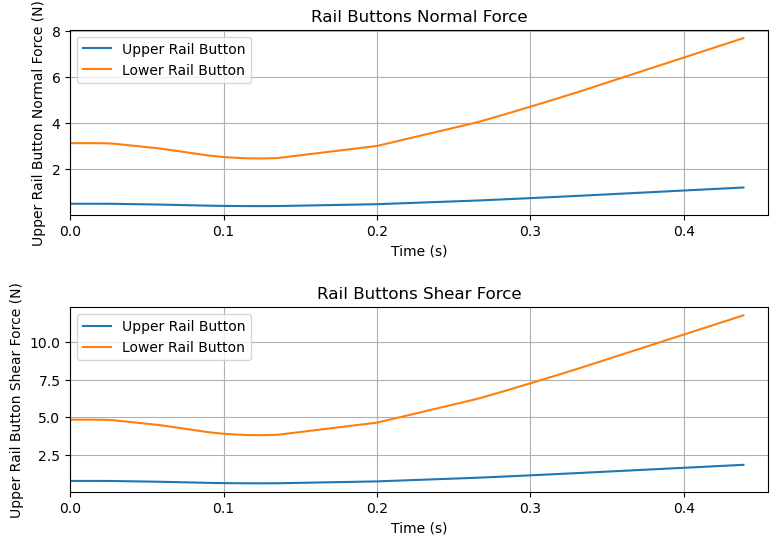



Trajectory Energy Plots



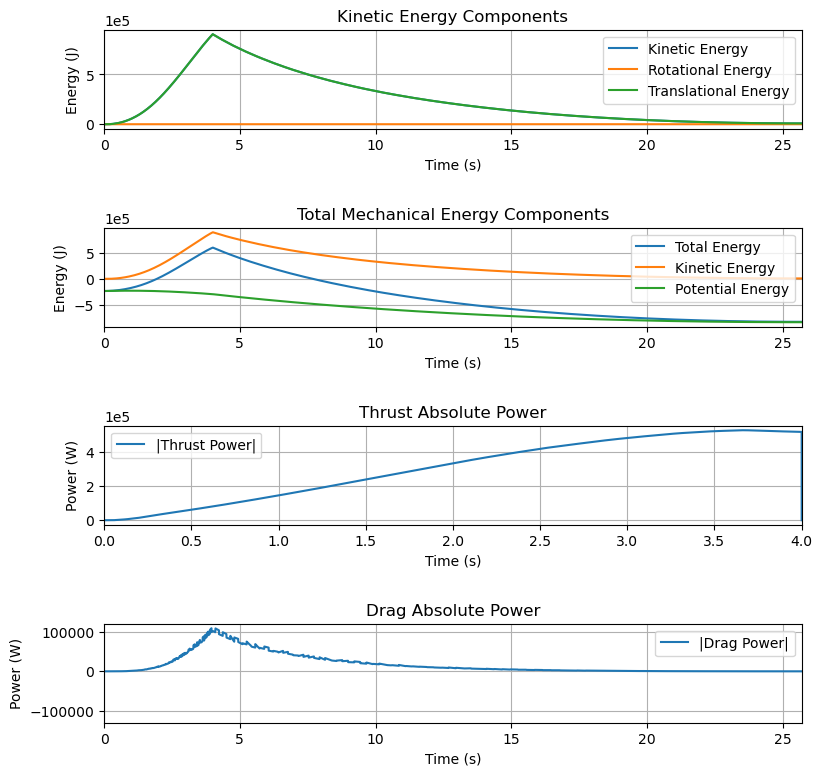



Trajectory Fluid Mechanics Plots



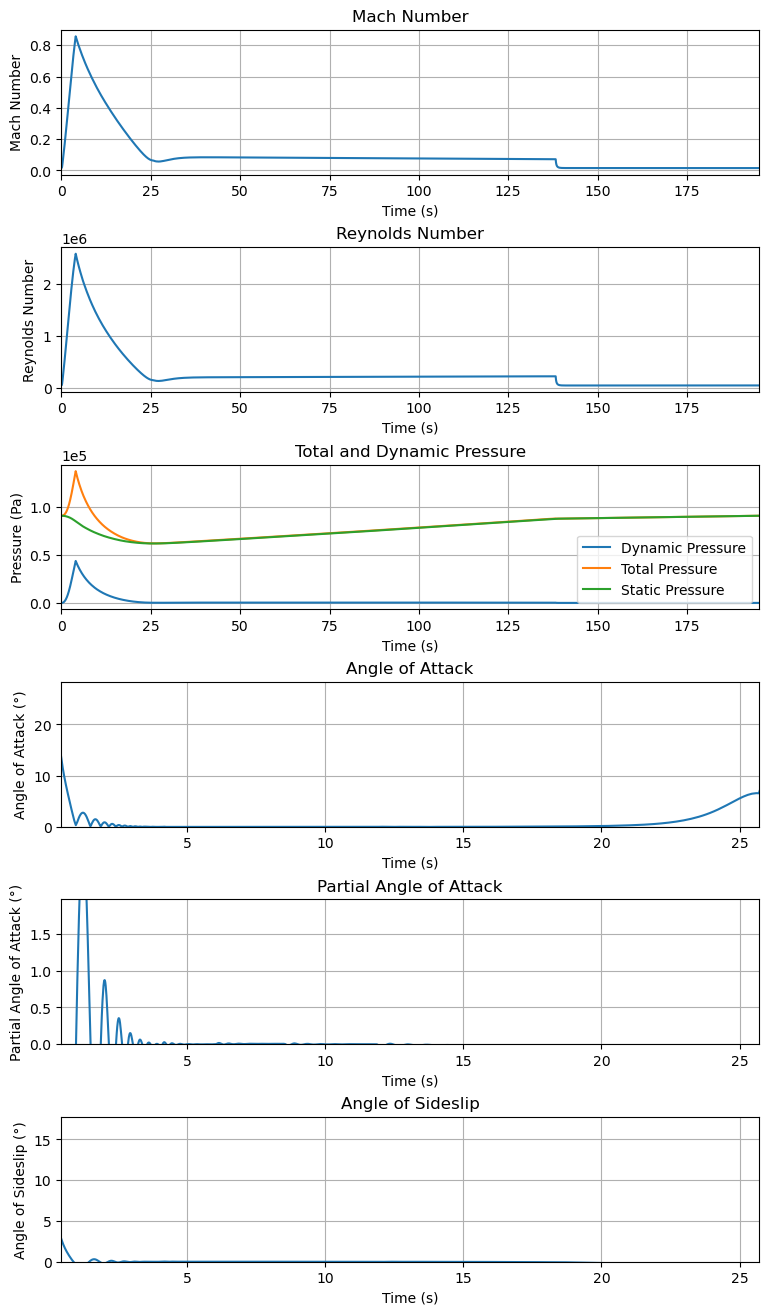



Trajectory Stability and Control Plots



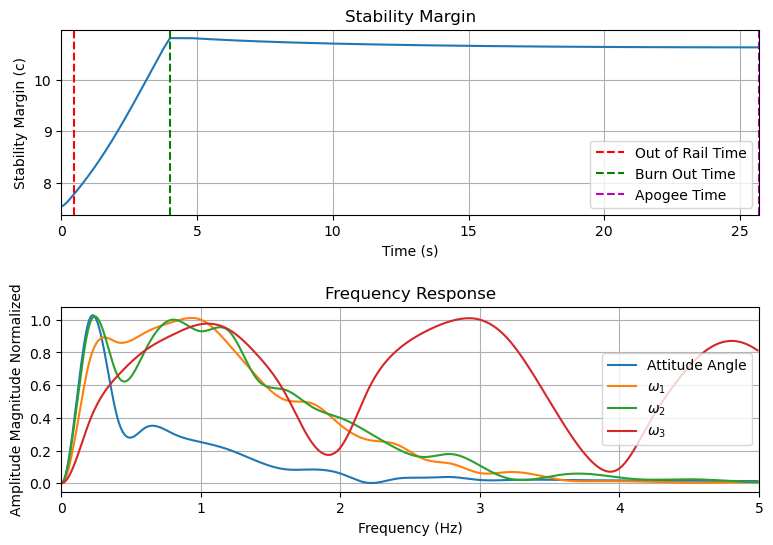



Rocket and Parachute Pressure Plots



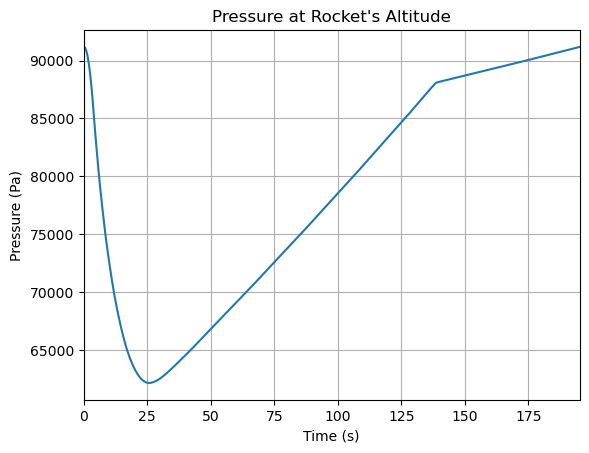


Parachute:  main


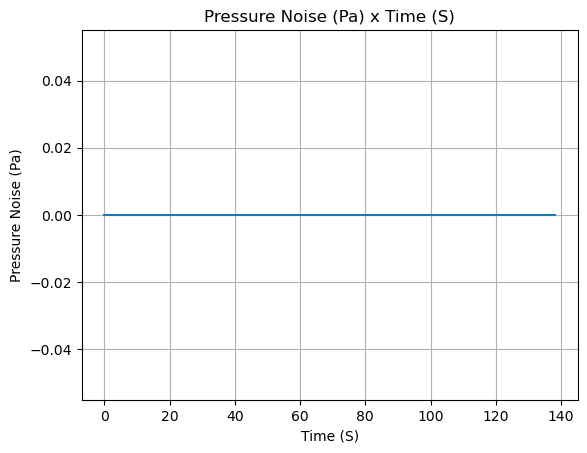

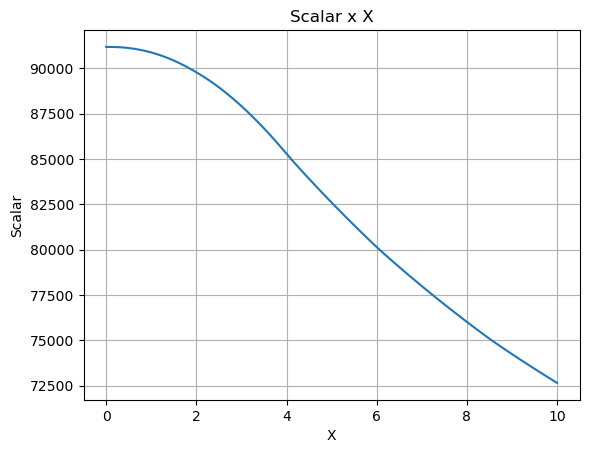

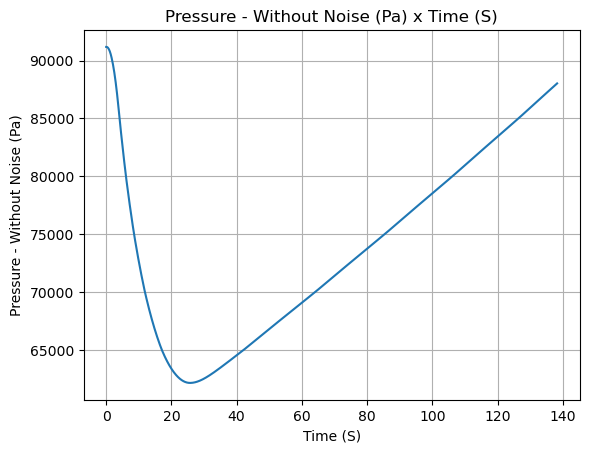


Parachute:  drogue


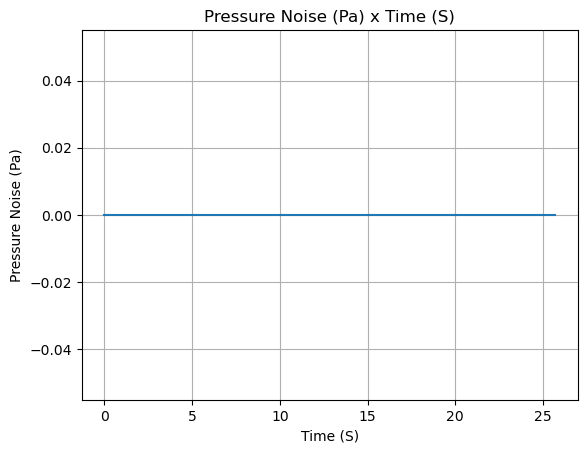

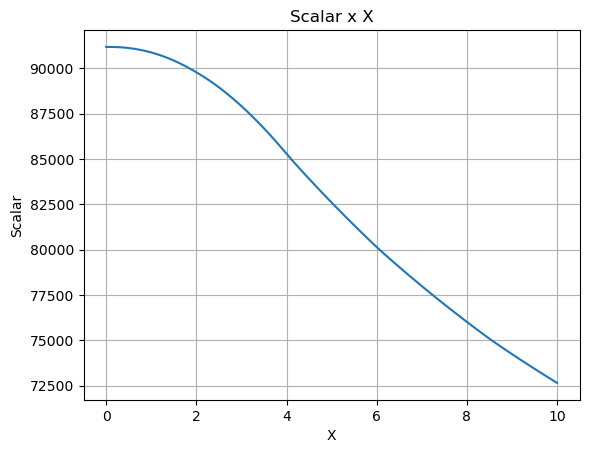

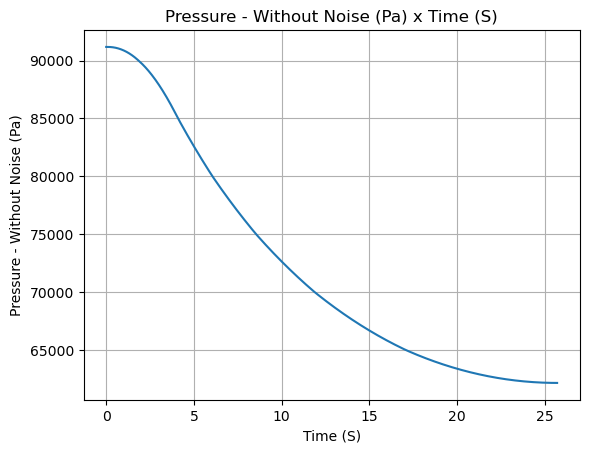

In [74]:
test_flight.all_info()